In [1]:
import pandas as pd, matplotlib.pyplot as plt, pylab as pl, numpy as np
libPath = 'project1/scripts'
import sys
if not libPath in sys.path: sys.path.append(libPath)
from implementations import *
# Use a subset 
df = pd.read_csv("clean_train_data.csv")[0:200]
df.head()


,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,1,0.257671,0.532835,0.474611,-1.093454,-0.870648,-0.632428,0.987313,1.378045,...,-0.156564,-0.542982,-0.660444,-0.578666,1.234399,0.251795,-0.367844,0.612965,-1.359329,-0.645152
1,100005,-1,-0.544388,-0.706350,-0.475044,0.064383,0.115251,-0.233525,0.094923,-0.819132,...,1.229416,-0.370559,1.514133,-0.239608,-1.377788,-0.354529,-0.054320,0.115912,1.711823,0.094961
2,100006,1,0.426952,-0.208400,0.719034,-0.069451,-0.971751,-0.548472,0.276686,1.219260,...,-0.799385,-0.290304,-0.660444,0.236631,0.498040,0.807823,-0.032535,0.070414,-1.520013,-0.032292
3,100011,-1,-0.132873,-0.812497,-0.068375,-1.056294,0.073553,-0.313332,-0.144736,1.150840,...,1.180350,-0.315521,1.514133,-0.441676,-0.449036,0.173863,-0.032256,0.873721,-1.141415,-0.163737
4,100023,1,0.307234,-1.123065,0.812311,0.820835,-0.273740,-0.034514,-0.011685,-0.853987,...,-0.540272,0.858731,-0.660444,1.300559,0.665238,0.789031,0.762212,-0.384076,-1.529918,0.873721


In [2]:
# Calculate the correlation between features 

cross_correlate_vec = []
for i in range(29):
    cross_correlate_vec.append(np.correlate(df.iloc[:,1], df.iloc[:,2+i])[0])
# np.correlate(df.iloc[:,1], df.iloc[:,2])

print(cross_correlate_vec)

coef_vec = []
for i in range(29):
    coef_vec.append(np.corrcoef(df.iloc[:,1], df.iloc[:,2+i])[0,1])

print(coef_vec)


[12.684015453234164, -30.64924549658443, 11.528048130248068, 16.836362374213156, 18.29516879654088, 31.018651911771894, -15.90254427956277, 4.268537739309625, -23.92269654908171, 4.0637348084558695, -17.547421420038408, 24.580504880820584, 40.9827909740777, 25.44846635470718, -10.110007678086813, -7.861465188038784, 7.109757588287941, -23.72387040483661, -2.036009973073659, 4.708919753465051, -9.527800310775062, -4.899155166401244, -52.88212292139813, 15.925998952932746, -9.304354486797163, -20.802619099789624, -13.176004333435202, 4.850923294346719, 2.2516586488785357]
[0.06398789233864756, -0.20031492671247259, 0.06542337874713541, 0.07564442438935697, 0.098999992950553, 0.16950037185842892, -0.09323621581887004, 0.028275475090500865, -0.13355617637992825, 0.022473189064202904, -0.11391174558150055, 0.14879625057199802, 0.21752757909875078, 0.11629605185364744, -0.04633354584651434, -0.0375313050315028, 0.030859503671228607, -0.10519500723713572, -0.007626430373025195, 0.013049909881

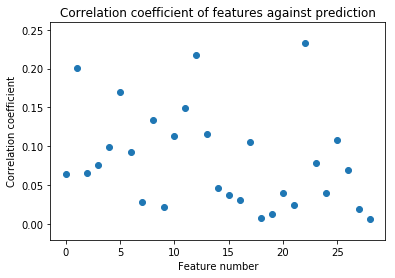

In [3]:
# plt.scatter(cross_correlate_vec, coef_vec)

plt.scatter(range(29), np.abs(coef_vec))
plt.xlabel("Feature number")
plt.ylabel("Correlation coefficient")
plt.title("Correlation coefficient of features against prediction")
# plt.savefig("Figures/feature_corr_coef")

In [17]:
# get the number of features that have coef value greater than 10 
coef_vec_abs = np.abs(coef_vec)

np.sum(coef_vec_abs>0.1)

feature_list_ind = [i+2 for i, x in enumerate(coef_vec_abs) if x>0.1]

# feature list, 0 indexed starting from DER_mass_MMC
print(feature_list_ind)


[3, 7, 10, 12, 13, 14, 15, 19, 24, 27]


In [5]:
# import seaborn as sns 

# feature_sets = pd.concat([df['Prediction'], df.iloc[:,19:31]], axis=1)

# 30 usefule features: 3x10 

# sns.set(style="ticks")
# sns_plot = sns.pairplot(pd.concat([df['Prediction'], df[df.columns[[feature_list_ind]]]], axis=1), hue="Prediction")
# image_title="scatter_matrix_train"+str(i)

In [20]:
coef_matrix = np.array([[0 for i in range(10)] for j in range(10)])
for i in range(10): 
    foo = feature_list_ind[i]
    for j in range(10): 
        bar = feature_list_ind[j]
#         print(np.corrcoef(df.iloc[:,foo], df.iloc[:,bar])[0,1])
        coef_matrix[i][j]=np.corrcoef(df.iloc[:,foo], df.iloc[:,bar])[0,1]


1.0
-0.09261719118596226
-0.015386264623975784
0.18475415896405842
-0.38116757461172784
0.03009947311426769
-0.1900566346460864
-0.09143606086473068
-0.020211545186875127
0.15062302759263568
-0.09261719118596225
1.0
-0.03544303166731691
0.12292983206726406
0.12175659980449237
0.41303099932778264
0.03414997035078708
0.0188901953348237
-0.03321018449965162
-0.06087847212537627
-0.015386264623975784
-0.0354430316673169
1.0
0.03809581174359571
-0.07576660099192649
-0.16700526628591186
0.09421672038920288
-0.04583803365944041
0.6412827976058246
0.02119173208132089
0.18475415896405842
0.12292983206726406
0.038095811743595706
1.0
-0.08687747129282888
0.051469322995723946
-0.4613313097656532
-0.031627437644017035
0.032503380544567535
0.016549767958191595
-0.38116757461172784
0.12175659980449237
-0.07576660099192649
-0.0868774712928289
1.0
0.06630873915563372
0.0992052182183841
0.08900665214854464
-0.15606779577019253
-0.12563809142585156
0.03009947311426769
0.41303099932778264
-0.1670052662859

In [21]:

# for x in coef_matrix: 
#     print(*x, sep=" ")
# np.set_printoptions(precision=4)

# for x in coef_matrix: 
#     print(x)

print(coef_matrix)
# print(coef_matrix)

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
